In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [24]:
df.rename(columns={'age': 'idade', 'job': 'trabalho', 'marital': 'estado_civil', 'education': 'educacao', 'default': 'inadimplente', 'balance': 'saldo_cc','housing': 'emprestimo_imobiliario', 'loan': 'emprestimo_pessoal', 'contact': 'contato', 'day': 'dia', 'month': 'mes', 'day_of_week': 'dia_da_semana', 'duration': 'duracao', 'campaign': 'qtd_emprestimos', 'pdays': 'dias_desde_ultimo_contato', 'previous': 'contatos_anteriores', 'poutcome': 'resultado_anterior', 'emp.var.rate': 'taxa_de_variacao_emprego', 'cons.price.idx': 'indice_de_preco_consumidor', 'cons.conf.idx': 'indice_de_confianca_consumidor', 'euribor3m': 'euribor_3_meses', 'nr.employed': 'nr_empregados'}, inplace=True)
df

,idade,trabalho,estado_civil,educacao,inadimplente,saldo_cc,emprestimo_imobiliario,emprestimo_pessoal,contato,dia,mes,duracao,qtd_emprestimos,dias_desde_ultimo_contato,contatos_anteriores,resultado_anterior,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


idade: numérico
classe de trabalho: tipo de trabalho (categorial: “admin.”, “desconhecido”, “desempregado”, “gerente”, “empregada doméstica”, “empreendedor”, “estudante”, “operário”, “autônomo”, “ aposentado”, “técnico”, “serviços”)
marital : estado civil (categorial: “casado”, “divorciado”, “solteiro”; nota: “divorciado” significa divorciado ou viúvo)
educação (categorial: “desconhecido”, “secundário”, “primário”, “terciário”)
default: tem crédito em default? (binário: “sim”, “não”)
saldo: saldo médio anual, em euros (numérico)
habitação: tem crédito à habitação? (binário: “sim”, “não”)
empréstimo: tem empréstimo pessoal? (binário: “sim”, “não”)
contato: tipo de comunicação do contato (categorial: “desconhecido”, “telefone”, “celular”)
sexo: Feminino, Masculino.dia: dia do último contato do mês (numérico)
mês: último mês de contato do ano (categorial: “jan”, “fev”, “mar”, …, “nov”, “dez”)
duration: duração do último contato, em segundos (numérico)
campanha: número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)
pdays: número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (numérico, -1 significa que o cliente não foi contatado anteriormente)
anterior: número de contactos realizados antes desta campanha e para este cliente (numérico)
poutcome: resultado da campanha de marketing anterior (categorial: “desconhecido”, “outro”, “fracasso”, “sucesso”)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   idade                      4521 non-null   int64 
 1   trabalho                   4521 non-null   object
 2   estado_civil               4521 non-null   object
 3   educacao                   4521 non-null   object
 4   inadimplente               4521 non-null   object
 5   saldo_cc                   4521 non-null   int64 
 6   emprestimo_imobiliario     4521 non-null   object
 7   emprestimo_pessoal         4521 non-null   object
 8   contato                    4521 non-null   object
 9   dia                        4521 non-null   int64 
 10  mes                        4521 non-null   object
 11  duracao                    4521 non-null   int64 
 12  campanha                   4521 non-null   int64 
 13  dias_desde_ultimo_contato  4521 non-null   int64 
 14  contatos

In [12]:
df.describe()

,idade,saldo_cc,dia,duracao,campanha,dias_desde_ultimo_contato,contatos_anteriores
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
df.shape

(4521, 17)

In [14]:
df.columns.to_list()

['idade',
 'trabalho',
 'estado_civil',
 'educacao',
 'inadimplente',
 'saldo_cc',
 'emprestimo_imobiliario',
 'emprestimo_pessoal',
 'contato',
 'dia',
 'mes',
 'duracao',
 'campanha',
 'dias_desde_ultimo_contato',
 'contatos_anteriores',
 'resultado_anterior',
 'y']

In [29]:
df_null = df.isnull().sum().sort_values(ascending=True)
df_null

idade                        0
contatos_anteriores          0
dias_desde_ultimo_contato    0
qtd_emprestimos              0
duracao                      0
mes                          0
dia                          0
resultado_anterior           0
contato                      0
emprestimo_imobiliario       0
saldo_cc                     0
inadimplente                 0
educacao                     0
estado_civil                 0
trabalho                     0
emprestimo_pessoal           0
y                            0
dtype: int64

In [17]:
# Verificando se há valores nulos em cada coluna
print(df.isnull().any())

# Verificando se há valores nulos em cada linha
print(df.isnull().any(axis=1))

idade                        False
trabalho                     False
estado_civil                 False
educacao                     False
inadimplente                 False
saldo_cc                     False
emprestimo_imobiliario       False
emprestimo_pessoal           False
contato                      False
dia                          False
mes                          False
duracao                      False
campanha                     False
dias_desde_ultimo_contato    False
contatos_anteriores          False
resultado_anterior           False
y                            False
dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool


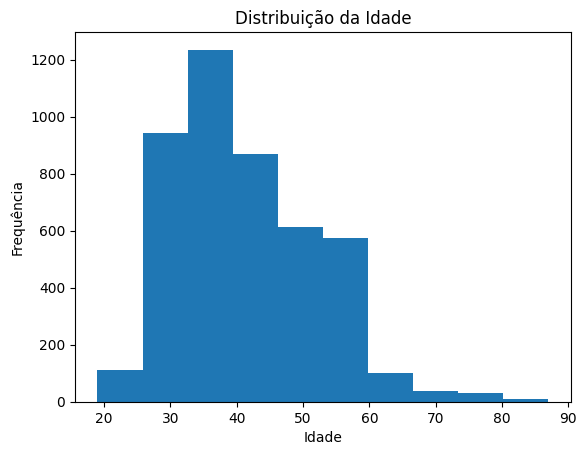

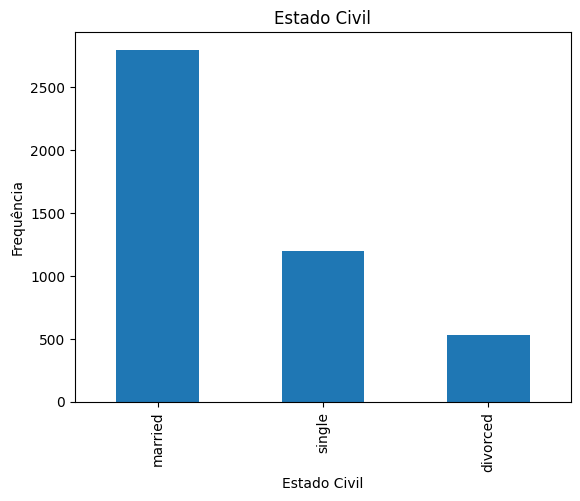

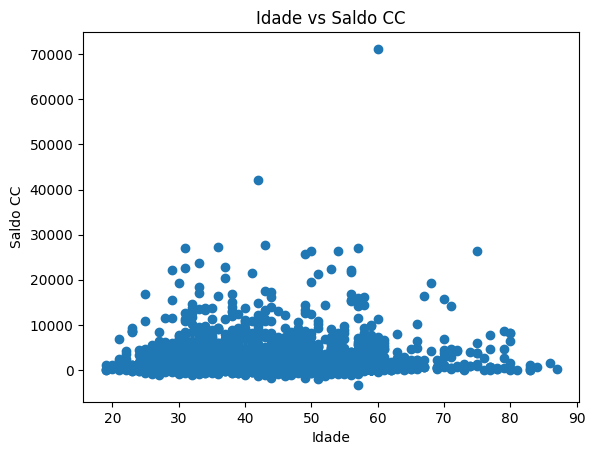

In [44]:
# Visualização dos dados
# Histograma da idade
plt.hist(df['idade'])
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras do estado civil
df['estado_civil'].value_counts().plot(kind='bar')
plt.title('Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão entre idade e saldo_cc
plt.scatter(df['idade'], df['saldo_cc'])
plt.title('Idade vs Saldo CC')
plt.xlabel('Idade')
plt.ylabel('Saldo CC')
plt.show()

In [26]:
# Substitua 'yes' por 1 e 'no' por 0 na coluna 'inadimplente'
df['inadimplente'] = df['inadimplente'].replace({'yes': 1, 'no': 0})



In [32]:
# Agrupe os dados por trabalho e calcule a média da coluna inadimplente
work_default = df.groupby('trabalho')['inadimplente'].mean()

# Converta a taxa média de inadimplência em percentual
work_default = work_default.apply(lambda x: f'{x*100:.2f}%')

# Exiba os resultados
print(work_default)

trabalho
admin.           1.26%
blue-collar      1.48%
entrepreneur     4.17%
housemaid        1.79%
management       1.44%
retired          1.30%
self-employed    2.19%
services         1.68%
student          1.19%
technician       1.95%
unemployed       2.34%
unknown          0.00%
Name: inadimplente, dtype: object


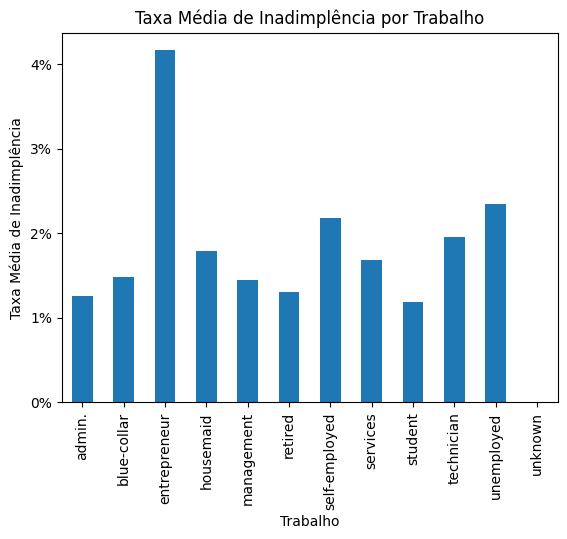

In [38]:
from matplotlib.ticker import FuncFormatter, MultipleLocator


# Agrupe os dados por trabalho e calcule a média da coluna inadimplente
work_default = df.groupby('trabalho')['inadimplente'].mean()

# Crie uma função para formatar os valores do eixo y como percentuais
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Gere um gráfico de barras com os resultados
work_default.plot(kind='bar')
plt.title('Taxa Média de Inadimplência por Trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Taxa Média de Inadimplência')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

In [40]:
# Agrupe os dados por trabalho e calcule a média da coluna inadimplente
education_default = df.groupby('educacao')['inadimplente'].mean()

# Converta a taxa média de inadimplência em percentual
education_default = education_default.apply(lambda x: f'{x*100:.2f}%')

# Exiba os resultados
print(education_default)

educacao
primary      1.47%
secondary    1.99%
tertiary     1.26%
unknown      1.60%
Name: inadimplente, dtype: object


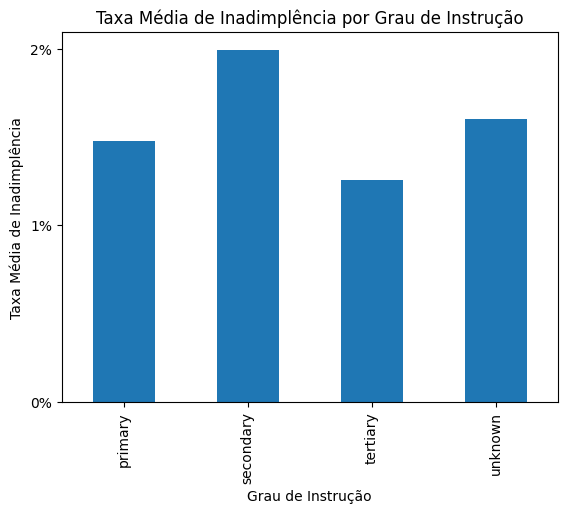

In [43]:
# Agrupe os dados por educação e calcule a média da coluna inadimplente
education_default = df.groupby('educacao')['inadimplente'].mean()

# Crie uma função para formatar os valores do eixo y como percentuais
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Gere um gráfico de barras com os resultados
education_default.plot(kind='bar')
plt.title('Taxa Média de Inadimplência por Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Taxa Média de Inadimplência')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

In [48]:
mais_novo = df['idade'].min()
print(mais_novo)
mais_velho = df['idade'].max()
print(mais_velho)

19
87


In [52]:
# Substitua 'yes' por 1 e 'no' por 0 na coluna 'emprestimo_imobiliario'
df['emprestimo_imobiliario'] = df['emprestimo_imobiliario'].replace({'yes': 1, 'no': 0})

# Substitua 'yes' por 1 e 'no' por 0 na coluna 'emprestimo_pessoal'
df['emprestimo_pessoal'] = df['emprestimo_pessoal'].replace({'yes': 1, 'no': 0})

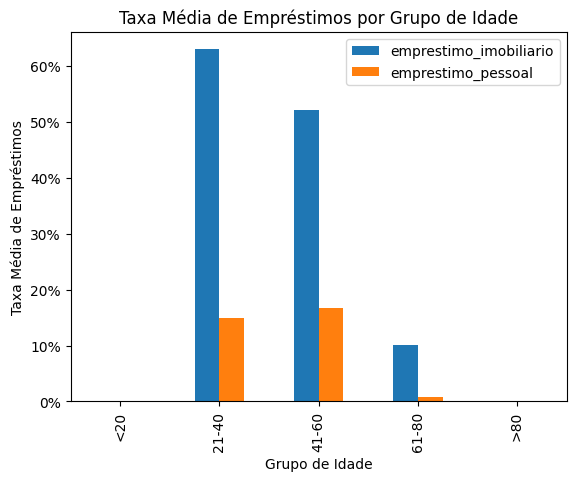

In [56]:
# Divida a coluna idade em grupos de idade
df['grupo_idade'] = pd.cut(df['idade'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '21-40', '41-60', '61-80', '>80'])

# Agrupe os dados por grupo de idade e calcule a soma das colunas de empréstimo
age_loan = df.groupby('grupo_idade')[['emprestimo_imobiliario', 'emprestimo_pessoal']].mean()

# Gere um gráfico de barras com os resultados
age_loan.plot(kind='bar')
plt.title('Taxa Média de Empréstimos por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Taxa Média de Empréstimos')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.show()

In [57]:
saldo_min = df['saldo_cc'].min()
print('Saldo mínimo: ', saldo_min)
saldo_max = df['saldo_cc'].max()
print('Saldo máximo: ', saldo_max)

Saldo mínimo:  -3313
Saldo máximo:  71188


Total de inadimplência: 76
Quantidade total de empréstimos: 3250


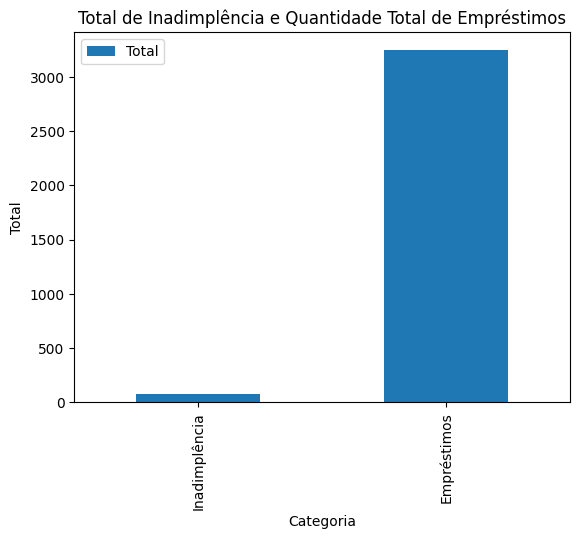

In [64]:
# Calcule o total de inadimplência
total_default = df['inadimplente'].sum()

# Calcule a quantidade total de empréstimos
total_loans = df[['emprestimo_imobiliario', 'emprestimo_pessoal']].sum().sum()

# Exiba os resultados
print(f'Total de inadimplência: {total_default}')
print(f'Quantidade total de empréstimos: {total_loans}')

# Crie um dataframe com os resultados
data = pd.DataFrame({'Total': [total_default, total_loans]}, index=['Inadimplência', 'Empréstimos'])

# Gere um gráfico de barras com os resultados
data.plot(kind='bar')
plt.title('Total de Inadimplência e Quantidade Total de Empréstimos')
plt.xlabel('Categoria')
plt.ylabel('Total')
plt.show()

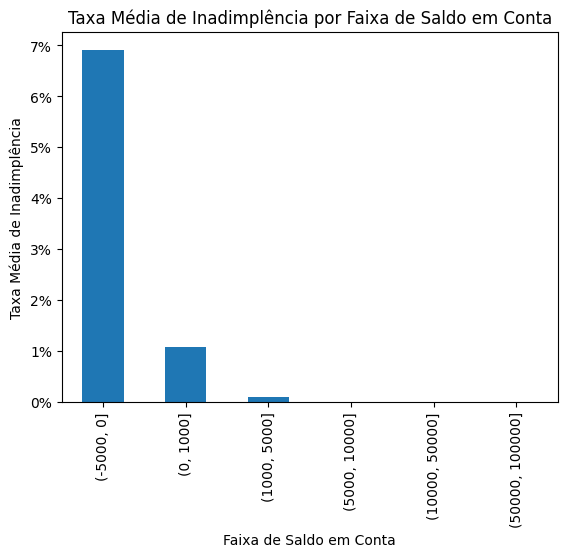

In [62]:
# Divida a coluna 'saldo_cc' em grupos
df['grupo_saldo'] = pd.cut(df['saldo_cc'], bins=[-5000, 0, 1000, 5000, 10000, 50000, 100000])

# Agrupe os dados por grupo de saldo e calcule a média da coluna inadimplente
balance_default = df.groupby('grupo_saldo')['inadimplente'].mean()

# Gere um gráfico de barras com os resultados
balance_default.plot(kind='bar')
plt.title('Taxa Média de Inadimplência por Faixa de Saldo em Conta')
plt.xlabel('Faixa de Saldo em Conta')
plt.ylabel('Taxa Média de Inadimplência')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

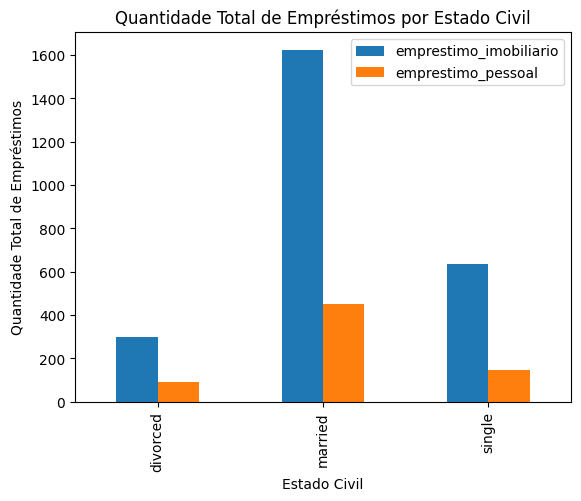

In [65]:
# Agrupe os dados por estado civil e calcule a soma das colunas de empréstimo
marital_loan = df.groupby('estado_civil')[['emprestimo_imobiliario', 'emprestimo_pessoal']].sum()

# Gere um gráfico de barras com os resultados
marital_loan.plot(kind='bar')
plt.title('Quantidade Total de Empréstimos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade Total de Empréstimos')
plt.show()

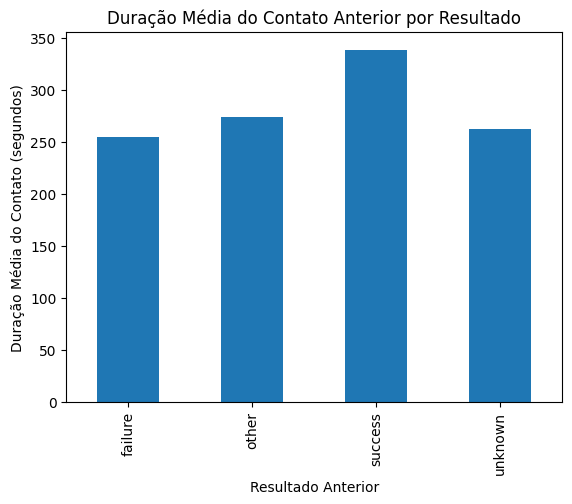

In [66]:
# Agrupe os dados por resultado anterior e calcule a média da coluna duracao
result_duration = df.groupby('resultado_anterior')['duracao'].mean()

# Gere um gráfico de barras com os resultados
result_duration.plot(kind='bar')
plt.title('Duração Média do Contato Anterior por Resultado')
plt.xlabel('Resultado Anterior')
plt.ylabel('Duração Média do Contato (segundos)')
plt.show()